#             Geolog Python Loglan Tutorial
## Conventional Logs with NMR Shaly-Sand Example



### Introduction:

###### This Geolog Python tutorial started from the PetroGG repository written by Mihai on GitHub

https://github.com/petroGG/Basic-Well-Log-Interpretation

###### His coding example was then modified with our own shaley-sand methods that are now being employed in Geolog as python loglan code. This particular example is from the Gulf of Mexico. The example has confentional and NMR logs. This is a shaly-sand well that utilizes Dual-Water and Waxman-Smits equations to account for the conductance of the clays in the calculations of the water saturations.  

###### Normally we would load the log data directly from a Geolog well from a loglan template specifically made for python as shown below: 

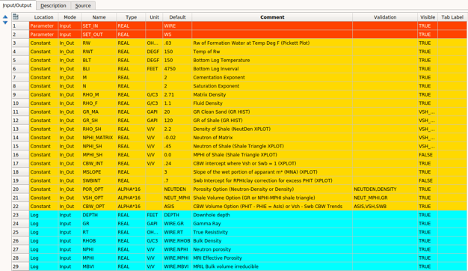

###### However, for this notebook the conventional logs and NMR data are being loaded from the Gulf_Coast_NMR.txt text file provided. 

###### The original PetroGG gave us a good foundation in building proper depth plots, cross plots and histograms in python. We have made a number of additions to the original PetroGG. First of all, we have modified the code to use a Vshale and not Vclay as was previously employed. Almost all shales have less than 100% clay volume. We have personally sampled some of the greasiest, gumbo shales to find that the maximum clay content was only about 65% according to the XRD or FTIR mineralogy data. Therefore, estimating the clay endpoint parameters for a clay point is a challenge since this 100% clay points is an imaginary points. This point does not exist in the data. Instead we use a shale point which can be observed in most shaly-sands data sets with a well develped shale. However, with sufficient mineralogy data from core samples or elemental log data like Schlumberger's Elemental Capture Spectroscopy (ECS), we could model the volume of clay for future applications. 

###### We have included two additional Saturation models suitable for shaly-sand analysis. We started with his Waxman-Smits and Dual-Water saturation models from his repository and then modified his code to employ George Coates' MRIAN Dual-Water and a Waxman-Smits iterative model where we calculate Qv from the Hill Shirley and Kein equation shown below.  

###### NMR data has been found to be quite useful in assessing reservoir quality and defining the volume of non-movable Capillary Bound Water (MBVI). However, the combination of NMR with conventional logs provides for a very holistic approach to our log analysis. One of the major benefits is accounting from the conductance due to Clay Bound Water (CBW) or the CBW saturation (Swb). CBW is associated with the waters chemically bound to the shales. CBW is determined from the difference between Total (PHIT) and Effective (PHIE) porosity. We typically start with the NMR effective porosity (MPHI for MRIL, or CMRP_3MS for SLB) as the effective porosity. In most oils and water with a high Hydrogen Index this is true. However, in light hydrocarbon, heavy oil and gas, the NMR effective porosity can be supressed. This results in an expanded CBW volume calculated from the difference between PHIT and the NMR effective porosity. This is called CBW apparent or CBWa.  

###### We typically use the plot of Vshale (or Swb) vs. CBWa as shown below to model CBW. As can be seen there is an excellent trend with these data. However, if there was gas or heavly oil, then there could be some samples that deviated from this trend showing much higher CBW volumes. We would ignore those data and concentrate on the primary trend shown below to model CBW for the entire well. 


                                   CBW = 0.2 * Vshale + 0




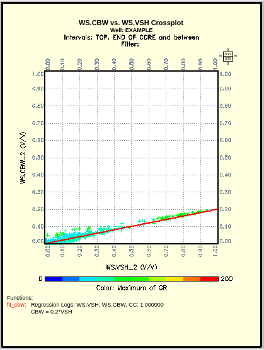

###### In this example we are using NMR data from an older Numar NMR tool that was only capable of measuring an NMR effective porosity (MPHI) and NMR Bulk Volume Irreducible (MBVI); all in the effective porosity system. This tool did not have the capability to employ the PR06 activation for the measurement of the Clay Bound Water (CBW) volume where the entire NMR signal then would be approaching total porosity. 

###### The NMR Capillary Bound Irreducible Water (MBVI) is calculated from the NMR T2 distribution by partitioning this T2 distribution into the Capillary Bound Water (MBVI) and Free Fluid (MFFI) based on a cutoff. The MFFI pore volume is associated with the larger pores with movable fluid where MBVI has the smaller pores with Capillary Bound Water that is a non-movable fluids. This partition point is called the T2 Cutoff, and for this clastic well the T2 Cutoff was 33ms. In Carbonate formations the T2 Cutoff is typically > 100ms due to the lower killing-strength in carbonate rock. 

## Saturation Models:

###### Since we have an estimated volume of CBW and Clay Bound Water Saturation (Swb = CBW/PHIT), we can use use the CBW volume to account for the conductivity of the CBW region and  calculate Qv for our shaley-sand saturation models. 

#### Dual-Water saturations using the George Coates (1) MRIAN analysis method developed at Numar to integrate conventional  and NMR log data for a robust interpretation. 

###### George Coates and the team at Numar devoped a Dual-Water saturation model that was near fool-proof and this was a part of their MRIAN analysis. They employed Dual-Water saturations and uses a variable 'w' for the electrical properties. They also accounted for an excess porosity calculated in the shales using RPHICLAY which discounted total porosity in the shales. 

####  Waxman-Smits saturation model using the Hill, Shirley and Klein equation(2) to calculate Qv from Swb as shown below:

                Qv = Swb/(0.6425/((Fluid_Density*Salinity(kppm))**0.5) + 0.22) 

###### We are using a standard iterative approach to Waxman-Smits or er have an option to use the equation provided by Crain in lieu of this iterative approach. 

###### Experience has shown that Waxman-Smits method is a bit more flexible to use in shaly-sand interpretations in that we can model the Waxman-Smits cementation exponent m* to vary with Vsh calibrated to Swb according to the trends observed in the wet intervals. A Cross Plot of Swb vs.  m*_apparent (MNA) is shown below.  The apparent m* increases as Vsh or Swb increase. This can best be ovserved in the wet intervals. m*_apparent goes quite high in the hydrocarbon bearing intervals and should not be used for the m* vs. Vsh or Swb trend. The m* at a Vsh or Swb of 0 (y-intercept) is the Archie m. , but in this case m* increases with increased Swb. We have also found that a wrong Rw can lead to an unrealistic y-intercept to give us feedback as to our choice of Rw too.

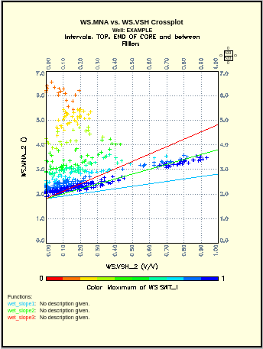

###### In the plot above for the y-axis values we calculated the apparent m* data using the following equation:

        m*_apparent = log10(Rw/(RT*(1+Rw*B*Qv)))/log10(PHIT)

###### The above plot shows m*_apparent vs. Vsh. Water saturations are on the z=axis. As can be seen, the wet trend (dark blue sample points) is rather well defined with a y intercept of approximately 1.9 and a slope of 1.8. The y intecpt at zero shale of Swb is the Archie m for the clean rock. This slope and intercept define the Waxman-Smits m*.  As Vsh or Swb incease, so does  m*. 

       m* = slope * Vsh + m_archie
       
###### From the above plot the the Archie m is 1.9 and the slope is 1.8. 

###### Finally, for our interpretation we typically compare our log analysis based Bulk Volume Water in the effective porosity system (BVWe) to MBVI, that is also in the effective porosity system, to determine what intervals have hydrocarbon saturations at irreducible water saturation with no movable water. In general, this is where we expect to have water free hydrocarbons if permeability is greater than 1mD. When BVWe is higher than MBVI, then we expect some movable water depending on the relative permeability and mobility of these fluids.

1. Coates, G.R., Gardner, J.S., and Miller, D.L., 1994, "Applying pulse-echo NMR to shaly sand formation evaluation", paper B, 35th Annual SPWLA Logging Symposium Transactions, 22 p.

2. Hill, H.J., Shirley, O.J., Klein, G.E.: “Bound Water in Shaley Sands - Its Relation to Qv and Other Formation Properties”, Log Analyst, May-June 1979.

3. Dacy, J., Martin, P.: "Practical Advances in Core-Based Water Saturation Analysis of Shaly Tight Gas Sands", SCA, SCA2009-29, 2009.

### Data: 
###### Log Data is found in GulfCoast_NMR.txt file

DEPTH	SP	GR	CALI	BitSize	LL8	ILM	ILD	RHOB	NPHI	DT	PHIX	RHOMAT	MBVI	MPHI

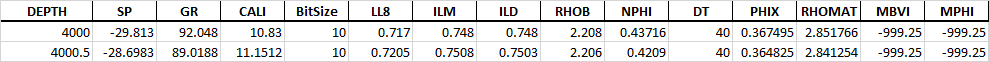

### Code:

### Python Requirements

In [1]:
# -*- coding: utf-8 -*-
"""
Used Spyder Editor

"""

"""
===============================================================================
 Import data from text file into a pandas Dataframe called: ``data''.
 Null data (-999.00000) will be replace by numpy.nan and M__DEPTH changed 
 with DEPT (much common abrevation in las files)
===============================================================================
"""

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec


### Load Data from this example from file. With Geolog we would just pull the data directly from the well

In [2]:
data=pd.read_table('GulfCoast_NMR.txt', delim_whitespace=True, index_col='DEPTH')

# The following is from Atibalazs Issues reported on Nov 7, 2018
#data=pd.read_table('WA1.txt', delim_whitespace=True)
#data=data.replace(-999.00000,np.nan)
#data=data.rename(columns=({'M__DEPTH':'DEPT'}))


#data=data.replace('-999.00000',np.nan)
data=data.replace(-999.25,np.nan)

data=data.rename(columns=({'DEPTH':'DEPT'}))
data['DEPT']=data.index

#data['NPHI']=data['NPHI']-0.04  #if Neutron on SS matrix, convert to ls
data['NPHI']=data['NPHI']

data.head()

,SP,GR,CALI,BitSize,LL8,ILM,ILD,RHOB,NPHI,DT,PHIX,RHOMAT,MBVI,MPHI,DEPT
DEPTH,,,,,,,,,,,,,,,
4000.0,-29.8130,92.0480,10.8300,10,0.7170,0.7480,0.7480,2.2080,0.437160,40,0.367495,2.851766,NaN,NaN,4000.0
4000.5,-28.6983,89.0188,11.1512,10,0.7205,0.7508,0.7503,2.2060,0.420900,40,0.364825,2.841254,NaN,NaN,4000.5
4001.0,-28.1250,87.8280,10.9470,10,0.7180,0.7550,0.7520,2.2060,0.420200,40,0.364816,2.841227,NaN,NaN,4001.0
4001.5,-27.6047,86.1570,11.1852,10,0.7347,0.7608,0.7557,2.2105,0.425797,40,0.364717,2.848040,NaN,NaN,4001.5
4002.0,-27.1880,87.1020,11.3960,10,0.7330,0.7650,0.7590,2.2180,0.433530,40,0.363871,2.857504,NaN,NaN,4002.0


### Petrophysical Parameters to be used in this shaley-sand log analysis:

In [3]:
"""
===============================================================================
           The following are the log parameter inputs for all calculations          
===============================================================================            

===============================================================================
 Shale and Porosity Parameters for many Calculations
    Mihai has a 100% clay point that I do not think is possible. 
    We use a 100% shale point 
===============================================================================
"""
gr_clean, gr_shale = 45, 120                                      # Shale Parmaetrs for GR
sp_clean, sp_shale = -50, 0                                       # Shale Parameters for SP
neut_shale, den_shale = 0.32, 2.65                                # Shale Parmaters for Neutron-Density
neut_matrix, den_matrix = -0.04, 2.65                             # Matrix Parmameters for Neutron-Density
neut_fl, den_fl = 1.0, 1.1                                        # Fluid Parameters for Neutron-Density
dt_matrix, dt_fluid, dt_shale, cp, alpha = 55.5,188.0,90.0,1,5/8  # Sonic Parameters
mphi_shale = 0.0

"""
===============================================================================
                      Electrical Properties
===============================================================================

===============================================================================
 We need to define first the variables: m_cem, n_sat. You can start with this
 pair(m_cem=2,_satn=2) as it works well in most of lithologies. If your
 matrix is shaly-mixed, the you can decrease the m_cem to 1.8.
 ==============================================================================
 IMO turtuosity factor 'a' should be 1.0 at 100% porosity where FF = Ro/Rw = 1
 ==============================================================================
"""
m_cem = 1.9    #cementation factor
n_sat = 2.0    #saturation exponent



"""
===============================================================================
 Then choose the water resistivity: Rwa. We’ll plot log Resistivity vs.
 log Porosity in Pickett plot. Data can be selected just for the reservoir
 formations (excluding the shaly intervals) by working with the vsh_limit
 (volume of shale) variable.
===============================================================================
"""
T   = 150.        # Reservoir temperature in DegF
TC  = (T-32)/1.8  # Temp DegC
RwT = T           # Temperature of Rw measument
Rwa = 0.03        # water resistivity at RwT
Rw  = Rwa         # Rw for saturation equations



### Calculations to be used with Waxman-Smits Saturations:

In [4]:
"""
 ===============================================================================
          Calculations used with Saturations
 ===============================================================================
"""
Rw75=((RwT+6.77)*Rwa)/(75+6.77)

# Salinity in KPPM
SAL=(10**((3.562-math.log10(Rw75-0.0123))/0.955))/1000

B = math.exp(7.3-28.242/math.log(T)-0.2266*math.log(Rwa)) 

Bdacy=(1-0.83*math.exp(-math.exp(-2.38+(42.17/TC))/Rwa))*(-3.16+1.59*math.log(TC))**2 #SCA Paper SCA2006-29 (3)

print('Res temp =', T, 'Rw at Res Temp =',Rwa, 'Rw@75 =', Rw75, 'B =',B, 'Bdacy =',Bdacy,'SAL =', SAL)      


Res temp = 150.0 Rw at Res Temp = 0.03 Rw@75 = 0.057516203986792226 B = 11.683469707767108 Bdacy = 12.157183503406632 SAL = 137.37633876842742


### Plot All Intervals

#### Define Plot limits for Well first

In [5]:
"""
===============================================================================
                    Depths over most of well interval
===============================================================================

===============================================================================
 a Main ZONE for analysis will be selected from the entire log. Program displays
 the logs again within the choosen interval with triple_combo_plot
 function.
 
 === Select zone of analysis: top and depth
 
 by setting the ``top_depth'' and ``bottom_depth'' variables
===============================================================================
"""

top_depth    = 4500
bottom_depth = 4750


#### Define Plot limits for Zone of Interest

In [6]:
"""
===============================================================================
                   Primary Zone of Interest
===============================================================================

===============================================================================
    Summary or Primary Zone of interest depths are required here
===============================================================================
"""
top_summary    = 4500
bottom_summary = 4750


#### Add Formation Tops

In [7]:
"""
===============================================================================
 === 1. Add formation tops & depths 
 
===============================================================================
"""

tops = ('TOP of ZONE','BOTTOM of ZONE','TD')
tops_depths=(4500,4750,5000)


## Define all Depth Plots in the following sections:

In [8]:
"""
===============================================================================
 === 2. Display the logs in Triple Combo Plot
 
 A triple-combo display will be created in matplotlib in order to
 visualize the curves. The template will be incorporated into the triple
 combo_plot function dependent on the selection of top and bottom depths
 of the graph.
 
 The triple combo display will consist in: - First track: GR, SP, CALI -
 Second track: Resistivities - Third Track: Density, Sonic and Neutronic
 
 In the next code lines, we will set the template.
===============================================================================
"""
# Create the TRIPLE COMBO figure and subplots
def triple_combo_plot(top_depth,bottom_depth):
    
    logs=data[(data.DEPT >= top_depth) & (data.DEPT <= bottom_depth)]
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12,16), sharey=True)
    fig.suptitle("Well Composite", fontsize=22)
    fig.subplots_adjust(top=0.75,wspace=0.1)

    #General setting for all axis
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False) 
        for (i,j) in zip(tops_depths,tops):
            if ((i>=top_depth) and (i<=bottom_depth)):
                axes.axhline(y=i, linewidth=1.0, color='red')
                axes.text(0.1, i ,j, horizontalalignment='center',verticalalignment='center', color = 'red')
    
        
    #1st track: GR, CALI, SP track
    ax01=ax[0].twiny()
    ax01.set_xlim(-100,10)
    ax01.spines['top'].set_position(('outward',0))
    ax01.set_xlabel("SP [mV]")
    ax01.plot(logs.SP, logs.DEPT, label='SP[mV]', color='black',linewidth=3.0)
    ax01.set_xlabel('SP[mV]',color='black')    
    ax01.tick_params(axis='x', colors='black')
    ax01.grid(True)
    
    ax02=ax[0].twiny()
    ax02.set_xlim(6,36)
    ax02.plot(logs.CALI, logs.DEPT, '--', label='CALN[in]', color='blue') 
    ax02.spines['top'].set_position(('outward',40))
    ax02.set_xlabel('CALI[in]',color='blue')    
    ax02.tick_params(axis='x', colors='blue')
    
    ax03=ax[0].twiny()
    ax03.set_xlim(0,150)
    ax03.plot(logs.GR, logs.DEPT, label='GR[api]', color='green') 
    ax03.spines['top'].set_position(('outward',80))
    ax03.set_xlabel('GR[api]',color='green')    
    ax03.tick_params(axis='x', colors='green')
    

    #2nd track: Resistivities
    ax11=ax[1].twiny()
    ax11.set_xlim(0.1,100)
    ax11.set_xscale('log')
    ax11.grid(True)
    ax11.spines['top'].set_position(('outward',80))
    ax11.set_xlabel('ILD[ohmm]', color='red')
    ax11.plot(logs.ILD, logs.DEPT, label='ILD[ohmm]', color='red', linewidth=2.0)
    ax11.tick_params(axis='x', colors='red')    
    
    ax12=ax[1].twiny()
    ax12.set_xlim(0.1,100)
    ax12.set_xscale('log')
    ax12.plot(logs.ILM, logs.DEPT, label='ILM[ohmm]', color='purple') 
    ax12.spines['top'].set_position(('outward',40))
    ax12.set_xlabel('ILM[ohmm]', color='purple')    
    ax12.tick_params(axis='x', colors='purple')
    
    ax13=ax[1].twiny()
    ax13.set_xlim(0.1,100)
    ax13.set_xscale('log')
    ax13.plot(logs.LL8, logs.DEPT, '--',label='LL8[ohmm]', color='blue') 
    ax13.spines['top'].set_position(('outward',0))
    ax13.set_xlabel('LL8[ohmm]',color='blue')
    ax13.tick_params(axis='x', colors='blue')

    #3rd track: DT, RHOB, NPHI track
    ax21=ax[2].twiny()
    ax21.grid(True)
    ax21.set_xlim(115,36)
    ax21.spines['top'].set_position(('outward',0))
    ax21.set_xlabel('DT[us/ft]')
    ax21.plot(logs.DT, logs.DEPT, label='DT[us/ft]', color='blue')
    ax21.set_xlabel('DT[us/ft]', color='blue')    
    ax21.tick_params(axis='x', colors='blue')
    
    ax22=ax[2].twiny()
    ax22.set_xlim(-0.15,0.45)
    ax22.invert_xaxis()
    ax22.plot(logs.NPHI, logs.DEPT, label='NPHI[v/v]', color='green') 
    ax22.spines['top'].set_position(('outward',40))
    ax22.set_xlabel('NPHI[v/v]', color='green')    
    ax22.tick_params(axis='x', colors='green')
    
    ax23=ax[2].twiny()
    ax23.set_xlim(1.95,2.95)
    ax23.plot(logs.RHOB, logs.DEPT ,label='RHOB[g/cc]', color='red') 
    ax23.spines['top'].set_position(('outward',80))
    ax23.set_xlabel('RHOB[g/cc]',color='red')
    ax23.tick_params(axis='x', colors='red') 

    ax24=ax[2].twiny()
    ax24.set_xlim(-0.15,0.45)
    ax24.invert_xaxis()
    ax24.plot(logs.PHIX, logs.DEPT, label='PHIX[v/v]', color='cyan') 
    ax24.spines['top'].set_position(('outward',120))
    ax24.set_xlabel('PHIX[v/v]', color='cyan')    
    ax24.tick_params(axis='x', colors='cyan')
    #plt.savefig ('triple_combo_plot.png', dpi=200, format='png')

    #4th track: NMR
    ax31=ax[3].twiny()
    ax31.grid(True)
    ax31.set_xlim(0.5,0)
    ax31.spines['top'].set_position(('outward',0))
    ax31.set_xlabel('MPHI[v/v]')
    ax31.plot(logs.MPHI, logs.DEPT, label='MPHI[v/v]', color='black')
    ax31.set_xlabel('MPHI[v/v]', color='black')    
    ax31.tick_params(axis='x', colors='black')

    ax32=ax[3].twiny()
    ax32.grid(True)
    ax32.set_xlim(0.5,0)
    ax32.spines['top'].set_position(('outward',40))
    ax32.set_xlabel('MBVI[v/v]')
    ax32.plot(logs.MBVI, logs.DEPT, label='MBVI[v/v]', color='black')
    ax32.set_xlabel('MBVI[v/v]', color='black')    
    ax32.tick_params(axis='x', colors='black')
    ax32.fill_betweenx(logs.DEPT,logs.MBVI, 0,color='blue',label= 'MBVI')
    ax32.fill_betweenx(logs.DEPT,logs.MPHI, logs.MBVI,color='yellow',label= 'Free Fluid')    


In [9]:
# Create the Intermediate figure and subplots
def intermediate_plot(top_depth,bottom_depth):
    
    # =============================================================================
    # We will create several displays (GR,SP vs DEPTH track, histograms, N-D
    # crossplot, vsh track) in order to see and choose the right parameters
    # for our clay/clean formations as well as to compare the results of all
    # vsh methods calculated above.
    # =============================================================================



    #logs=data.iloc[[top_depth],[bottom_depth]]
    #logs=data[(data.DEPT >= top_depth) & (data.DEPT <= bottom_depth)]
    #print (logs.GR,logs.LLD)
    #Setting GRAPH ELEMENTS

    fig = plt.figure(figsize=(12,10))
    fig.suptitle('Volume of Shale from Different Methods',fontsize=18)
    fig.subplots_adjust(top=0.90,wspace=0.3, hspace =0.3)

    gs = gridspec.GridSpec(4, 3)
    ax1 = fig.add_subplot(gs[:,0])
    ax2 = fig.add_subplot(gs[0,1])
    ax3 = fig.add_subplot(gs[1,1])
    ax4 = fig.add_subplot(gs[2,1])
    ax5 = fig.add_subplot(gs[3,1])
    ax6 = fig.add_subplot(gs[:,2],sharey = ax1)


    # Graph for GR,SP
    ax1.invert_yaxis()
    ax1.grid(True)
    ax1.set_ylabel('DEPTH')
    ax1.plot(logs.GR, logs.DEPT, color='green')
    ax1.set_xlabel('GR [api]', color='green')

    ax11=ax1.twiny()
    ax11.plot(logs.SP, logs.DEPT, color='black', linewidth = 3.0)
    ax11.set_xlabel("SP [mV]",color='black')


    #The graph of GR histogram
    ax2.hist(logs.GR.dropna(),bins=30,color='green')
    ax2.set_xlabel('GR [api]')
    ax2.set_ylabel('Frequency')

    ax3.hist(logs.SP.dropna(),bins=30, color='black')
    ax3.set_xlabel('SP [mV]')
    ax3.set_ylabel('Frequency')

    ax4.hist(logs.ILD.dropna(),bins=30, color='gray')
    ax4.set_xlabel('ILD [ohmm]')
    ax4.set_ylabel('Frequency')


    # N-D XPlot for Volume of Shale
    ax5.plot(logs.NPHI, logs.RHOB,'ro',markersize=4)
    ax5.set_xlabel('NPHI [v/v]')
    ax5.set_xlim(-.05,1.0)
    ax5.set_ylim(3,1.0)
    ax5.set_ylabel('RHOB [g/cc]')
    ax5.grid(True)
    ax5.text(0.05, 2.1, 'clean line', color='red', fontsize=8)
    ax5.text(0.350, 2.95, 'shale point',color='red', fontsize=8)
    ax5.text(0.6, 1.2, 'fluid point',color='red', fontsize=8)
    # Plot Shale Triangle
    ax5.plot([neut_matrix,neut_fl],[den_matrix,den_fl], marker='o', color='blue') # this is clean line
    #ax5.plot([neut_matrix,1],[den_shaleale,1], marker='o', color='blue') #this is the clean line
    ax5.plot([neut_matrix,neut_shale],[den_matrix,den_shale], marker='o', color='blue') #this is to the shale point
    ax5.plot([neut_shale,1],[den_shale,den_fl], marker='o', color='blue') #this is from the shale point to 100% porosity line
    ax5.plot(neut_shale,den_shale,'ro',color='blue')
  

    #plt.title("Volume of Shale")
    ax6.plot(logs.vshgr, logs.DEPT, label ='Vshgr',color="green")
    ax6.plot(logs.vshnd, logs.DEPT,label ='Vshnd',color="red")
    ax6.plot(logs.vshsp, logs.DEPT,label ='Vshsp',color="black")
    ax6.plot(logs.vshnmphi, logs.DEPT,label ='VshN-Mphi',color="orange")
    ax6.legend(loc='best',fontsize='x-small')
    ax6.set_xlim(0,1)
    ax6.set_ylim(top_depth,bottom_depth)
    ax6.invert_yaxis()
    ax6.grid(True)
    ax6.set_xlabel('Vsh [v.v]')

    #plt.savefig ('vsh_plot.png', dpi=200, format='png')

    # =============================================================================
    # Use the histrograms to re-evaluate: - GR min, max (clean, clay) - SP
    # min, max (clean, clay) - RT min, max (clean, clay) From ND Xplot extract
    # the clean line and clay point.
    # 
    # All vshgr (you can apply any correction here), vshsp, vshrt and vshnd
    # curves are plotted in the same track for comparison. It is obvious that
    # the vshgr and vshnd match very well, comparing with the rest.
    # 
    # To simplify the intepretation we will accept the vshgr as the vsh.
    # Another approch is to consider vsh as the minimum value obtained through
    # several methods (vsh = min (vshgr,vshsp,vshnd)) or Hodges-Lehman Median Filter
    # =============================================================================




In [10]:
# Create the Final Plot figure and subplots
def final_plot(top_depth,bottom_depth):
    
    """
    ===============================================================================
     === 6. Display the ``Interpretation Plot''

     Create a plot template and add the results of volume of shale, saturation and porosity.
    ===============================================================================
    """


    # Create the figure and subplots
    fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(14,22), sharey=True)
    #fig.suptitle("Final Interpretation Depth Plot over Zone of Interest", fontsize=22)
    fig.subplots_adjust(top=0.75,wspace=0.1)

    ##General setting for all axis per Mahai
    #for axes in ax:
    #    axes.set_ylim (top_depth,bottom_depth)
    #    axes.invert_yaxis()
    #    axes.yaxis.grid(True)
    #    axes.get_xaxis().set_visible(False)
    #    for i in tops_depths:
    #            if ((i>=top_depth) and (i<=bottom_depth)):
    #                axes.axhline(y=i, linewidth=1.0, color='red')
    #for (i,j) in zip(tops_depths,tops):
    #    if ((i>=top_depth) and (i<=bottom_depth)):
    #        ax[0].text(0.2, i ,j, horizontalalignment='right',verticalalignment='center', color='red')        

    #General setting for all axis concentrating only on the Zone of Interest
    for axes in ax:
        axes.set_ylim (top_summary,bottom_summary)
        #axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False)
        for i in tops_depths:
                if ((i>=top_summary) and (i<=bottom_summary)):
                    axes.axhline(y=i, linewidth=1.0, color='red')
    for (i,j) in zip(tops_depths,tops):
        if ((i>=top_summary) and (i<=bottom_summary)):
            ax[0].text(0.2, i ,j, horizontalalignment='right',verticalalignment='center', color='red')                


    """
    #1st track: GR, SP, CALI track
    """
    ax01=ax[0].twiny()
    ax01.set_xlim(-100,10)
    ax01.plot(logs.SP, logs.DEPT, label='SP[mV]', color='black',linewidth=3.0)
    ax01.set_xlabel('SP[mV]',color='black')    
    ax01.tick_params(axis='x', colors='black')

    ax02=ax[0].twiny()
    ax02.set_xlim(6,36)
    ax01.grid(True)
    ax02.plot(logs.CALI, logs.DEPT, '--', label='CALI[in]', color='blue') 
    ax02.spines['top'].set_position(('outward',40))
    ax02.set_xlabel('CALI[in]',color='blue')    
    ax02.tick_params(axis='x', colors='blue')

    ax03=ax[0].twiny()
    ax03.set_xlim(0,150)
    ax03.plot(logs.GR, logs.DEPT, label='GR[api]', color='green') 
    ax03.spines['top'].set_position(('outward',80))
    ax03.set_xlabel('GR[api]',color='green')    
    ax03.tick_params(axis='x', colors='green')


    """
    #2nd track: Resistivities
    """
    ax11=ax[1].twiny()
    ax11.set_xlim(0.1,100)
    ax11.set_xscale('log')
    ax11.grid(True)
    ax11.spines['top'].set_position(('outward',80))
    ax11.set_xlabel('ILD[ohmm]', color='red')
    ax11.plot(logs.ILD, logs.DEPT, label='ILD[ohmm]', color='red', linewidth = 2.0)
    ax11.tick_params(axis='x', colors='red')    

    ax12=ax[1].twiny()
    ax12.set_xlim(0.1,100)
    ax12.set_xscale('log')
    ax12.plot(logs.ILM, logs.DEPT, label='ILM[ohmm]', color='purple') 
    ax12.spines['top'].set_position(('outward',40))
    ax12.set_xlabel('ILM[ohmm]', color='purple')    
    ax12.tick_params(axis='x', colors='purple')

    ax13=ax[1].twiny()
    ax13.set_xlim(0.1,100)
    ax13.set_xscale('log')
    ax13.plot(logs.LL8, logs.DEPT, '--',label='LL8[ohmm]', color='blue') 
    ax13.spines['top'].set_position(('outward',0))
    ax13.set_xlabel('LL8[ohmm]',color='blue')
    ax13.tick_params(axis='x', colors='blue')


    """
    #3rd track: DT, RHOB, NPHI track
    """
    ax21=ax[2].twiny()
    ax21.set_xlim(-0.15,0.45)
    ax21.invert_xaxis()
    ax21.plot(logs.PHIE, logs.DEPT, label='PHIE[v/v]', color='purple',linewidth=2.0) 
    ax21.spines['top'].set_position(('outward',120))
    ax21.set_xlabel('PHIE[v/v]', color='purple')    
    ax21.tick_params(axis='x', colors='purple') 
    #ax21.legend(loc='lower left')

    ax22=ax[2].twiny()
    ax22.set_xlim(-0.15,0.45)
    ax22.invert_xaxis()
    ax22.plot(logs.PHIT, logs.DEPT, label='PHIT[v/v]', color='black',linewidth=2.0) 
    ax22.spines['top'].set_position(('outward',160))
    ax22.set_xlabel('PHIT[v/v]', color='black')    
    ax22.tick_params(axis='x', colors='black') 
    ax22.fill_betweenx(logs.DEPT,logs.PHIE,logs.PHIT,color='lightgray',label='Shale')
    ax22.legend(loc='lower left')

    ax23=ax[2].twiny()
    ax23.grid(True)
    ax23.set_xlim(115,36)
    ax23.spines['top'].set_position(('outward',0))
    ax23.set_xlabel('DT[us/ft]')
    ax23.plot(logs.DT, logs.DEPT, label='DT[us/ft]', color='blue',linewidth=1.0)
    ax23.set_xlabel('DT[us/ft]', color='blue')    
    ax23.tick_params(axis='x', colors='blue')
    #ax23.legend(loc='lower left')

    ax24=ax[2].twiny()
    ax24.set_xlim(-0.15,0.45)
    ax24.invert_xaxis()
    ax24.plot(logs.NPHI, logs.DEPT, label='NPHI[v/v]', color='green') 
    ax24.spines['top'].set_position(('outward',40))
    ax24.set_xlabel('NPHI[v/v]', color='green')    
    ax24.tick_params(axis='x', colors='green')
    #ax24.legend(loc='lower left')

    ax25=ax[2].twiny()
    ax25.set_xlim(1.95,2.95)
    ax25.plot(logs.RHOB, logs.DEPT ,label='RHOB[g/cc]', color='red',linewidth=1.0) 
    ax25.spines['top'].set_position(('outward',80))
    ax25.set_xlabel('RHOB[g/cc]',color='red')
    ax25.tick_params(axis='x', colors='red')
    #ax25.legend(loc='lower left')


    """
    #4th track: SW
    """
    ax31=ax[3].twiny()
    ax31.grid(True)
    ax31.set_xlim(1,0)
    ax31.plot(logs.Sw_ws, logs.DEPT, label='Sw_ws', color='red',linewidth=0.5)
    #ax33.plot(logs.SWs, logs.DEPT, label='SWs', color='green',linewidth=0.5)
    ax31.fill_betweenx(logs.DEPT,1,logs.Sw_ws,color='green',label='Sw_ws')
    ax31.fill_betweenx(logs.DEPT,0,logs.Sw_ws,color='cyan',label='Sw_ws')
    ax31.spines['top'].set_position(('outward',0))
    ax31.set_xlabel('Sw_WS', color='red')    
    ax31.tick_params(axis='x', colors='red')


    ax32=ax[3].twiny()
    ax32.grid(True)
    ax32.set_xlim(1,0)
    ax32.plot(logs.Sw_archie, logs.DEPT, label='Sw_archie', color='black',linewidth=0.5)
    #ax32.plot(logs.SWs, logs.DEPT, label='SWs', color='green',linewidth=0.5)
    ax32.spines['top'].set_position(('outward',40))
    ax32.set_xlabel('Sw_archie', color='black')    
    ax32.tick_params(axis='x', colors='black')

    ax33=ax[3].twiny()
    ax33.grid(True)
    ax33.set_xlim(1,0)
    ax33.plot(logs.Sw_dw, logs.DEPT, label='Sw_dw', color='black',linewidth=0.5)
    #ax33.plot(logs.SWs, logs.DEPT, label='SWs', color='green',linewidth=0.5)
    ax33.spines['top'].set_position(('outward',80))
    ax33.set_xlabel('Sw_DW', color='black')    
    ax33.tick_params(axis='x', colors='black')


    """
    #5th track: PHIE, BVW
    """
    ax41=ax[4].twiny()
    ax41.grid(True)
    ax41.set_xlim(0.5,0)
    ax41.plot(logs.PHIT, logs.DEPT, label='PHIT', color='black', linewidth=0.1)
    ax41.fill_betweenx(logs.DEPT,logs.PHIT, logs.PHIE,color='lightgray',label= 'CBW')
    ax41.spines['top'].set_position(('outward',0))
    ax41.set_xlabel('PHIT', color='black')    
    ax41.tick_params(axis='x', colors='black')

    ax42=ax[4].twiny()
    ax42.grid(True)
    ax42.set_xlim(0.5,0)
    ax42.plot(logs.PHIE, logs.DEPT, label='PHIE', color='black', linewidth=0.5)
    ax42.fill_betweenx(logs.DEPT,0,logs.WSCBVWE,color='cyan',label= 'Water')
    ax42.spines['top'].set_position(('outward',40))
    ax42.set_xlabel('PHIE', color='black')    
    ax42.tick_params(axis='x', colors='black')

    ax43=ax[4].twiny()
    ax43.set_xlim(0.5,0)
    ax43.plot(logs.WSCBVWE, logs.DEPT, label='WS BVWE', color='black')
    ax43.fill_betweenx(logs.DEPT,logs.PHIE, logs.WSCBVWE,color='red',label= 'HC')
    #ax43.fill_betweenx(logs.DEPT,logs.MBVI, 0,color='darkblue',label= 'MBVI')
    ax43.spines['top'].set_position(('outward',80))
    ax43.set_xlabel('WSCBVWE', color='black')    
    ax43.tick_params(axis='x', colors='black')

    ax44=ax[4].twiny()
    ax44.set_xlim(0.5,0)
    ax44.plot(logs.MBVI, logs.DEPT, label='MBVI', color='black')
    #ax44.fill_betweenx(logs.DEPT,logs.PHIE, logs.WSCBVWE,color='red',label= 'HC')
    ax44.fill_betweenx(logs.DEPT,logs.MBVI, 0,color='blue',label= 'MBVI')
    ax44.spines['top'].set_position(('outward',120))
    ax44.set_xlabel('MBVI', color='black')    
    ax44.tick_params(axis='x', colors='black')


    """
    #6th track: PHIE, MATRIX, Shale
    """
    ax50=ax[5].twiny()
    ax50.set_xlim(1,0)
    ax50.spines['top'].set_position(('outward',0))
    ax50.plot(logs.PHIE, logs.DEPT, label='PHIE', color='black',linewidth=0.5)
    ax50.set_xlabel('PHIE]', color='black')    
    ax50.tick_params(axis='x', colors='black')

    ax51=ax[5].twiny()
    ax51.set_xlim(0,1)
    ax51.spines['top'].set_position(('outward',40))
    ax51.plot(logs.vsh, logs.DEPT, label='Vsh', color='green',linewidth=0.5)
    ax51.set_xlabel('Vsh', color='green')    
    ax51.tick_params(axis='x', colors='green')

    ax52=ax[5].twiny()
    ax52.set_xlim(1,0)
    ax52.spines['top'].set_position(('outward',0))
    ax52.fill_betweenx(logs.DEPT,0,logs.PHIE,color='black',label='Porosity')
    ax52.fill_betweenx(logs.DEPT,logs.PHIE,1-logs.vsh,color='yellow',label='Matrix')
    ax52.fill_betweenx(logs.DEPT,1-logs.vsh,1,color='lightgray',label= 'Shale')
    ax52.legend(loc='lower left')

    #plt.savefig ('interpretation_plot.png', dpi=200, format='png')    



### Call Triple-Combo Depth Plot over entire well:

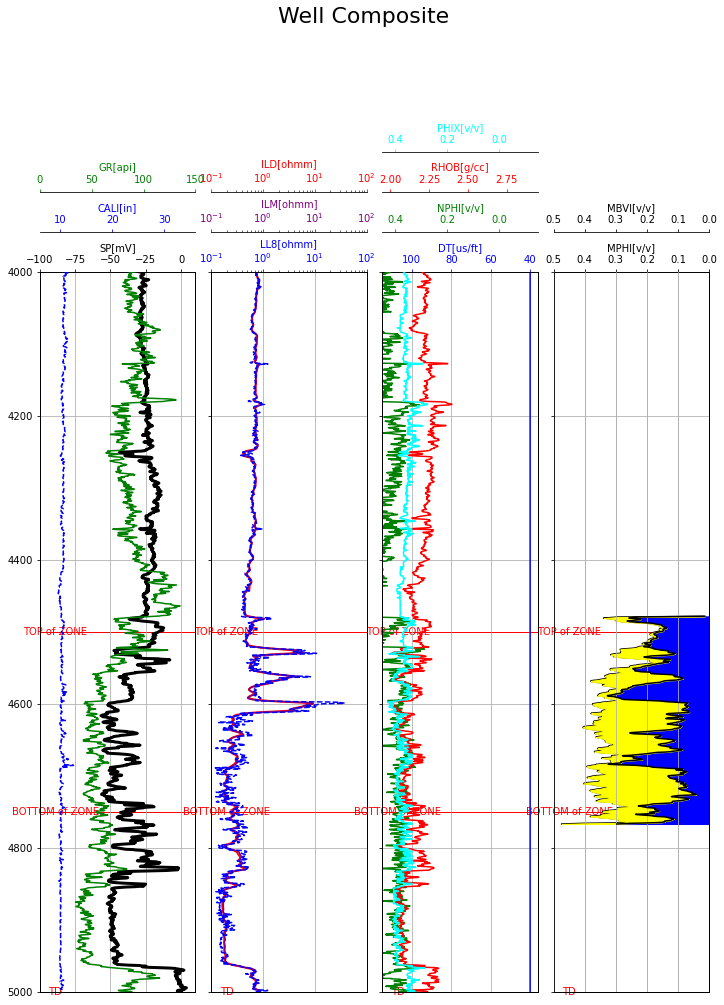

In [11]:
# =============================================================================
#      Display the logs for the whole well
# =============================================================================

triple_combo_plot(data.DEPT.min(),data.DEPT.max())

###  Call Depth Plot over Zone of Interest

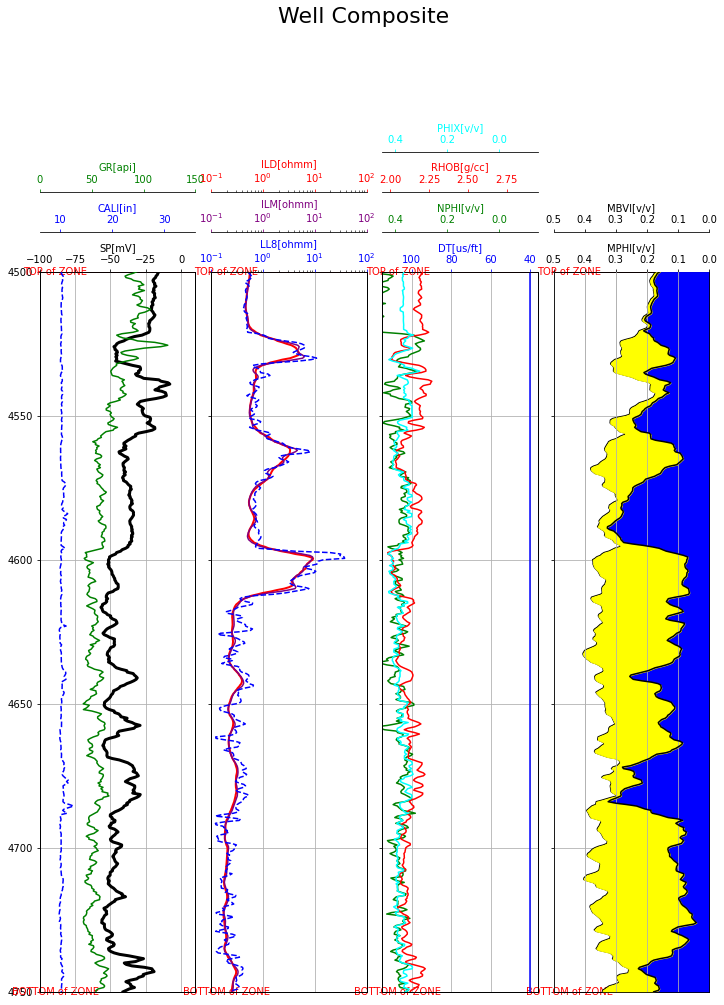

In [12]:
"""
===============================================================================
                    Major Zones of Interest
===============================================================================
===============================================================================
 a Main ZONE for analysis will be selected from the entire log. Program displays
 the logs again within the choosen interval with triple_combo_plot
 function.
 
 === Select zone of analysis: top and depth
 
 by setting the ``top_depth'' and ``bottom_depth'' variables
===============================================================================


# =============================================================================
# a ZONE for analysis will be selected from the entire log. Let’s display
# again the logs within the choosen interval with triple_combo_plot
# function.
# =============================================================================
"""

#Plot again using new Top and Bottom Depths. Could you do this with tops?
triple_combo_plot(top_depth,bottom_depth)

## Log Analysis Section:

### Calculate Shale Volumes:

In [13]:
"""
===============================================================================
 === 3. Calculate Volume of Shale
 
 The first step of a basic well log analysis will begin with the volume
 of Shale calculation.
 
 There are several methods used to perform that, clasified as: - Single
 methods: Gamma Ray Log, Spontaneous Potential, vshrt or by - Dual
 Methods: Neutron-Density, it is based on a N-D Crossplot, where a clean
 line and a clay point will be defined, as you will see in the graphs
 below.
===============================================================================
"""
#vshgr
#---the setup below is correction = None or linear GR as recommended by Heslep
def vshgr(gr_log, gr_clean, gr_shale, correction=None):

    igr=(gr_log-gr_clean)/(gr_shale-gr_clean)      #Linear Gamma Ray
    vshgr_larionov_young=0.083*(2**(3.7*igr)-1)   #Larionov (1969) - Tertiary rocks
    vshgr_larionov_old=0.33*(2**(2*igr)-1)        #Larionov (1969) - Older rocks
    vshgr_clavier=1.7-(3.38-(igr+0.7)**2)**0.5    #Clavier (1971)
    vshgr_steiber=0.5*igr/(1.5-igr)               #Steiber (1969) - Tertiary rocks

    if correction == "young":
        vshgr=vshgr_larionov_young
    elif correction == "older":
        vshgr=vshgr_larionov_old
    elif correction=="clavier":
        vshgr=vshgr_clavier
    elif correction=="steiber":
        vshgr=vshgr_steiber
    else:
        vshgr=igr
    return vshgr

#vshsp
def vshsp(sp_log, sp_clean, sp_shale):
    vshsp=(sp_log-sp_clean)/(sp_shale-sp_clean)
    return vshsp

#vshrt
def vshrt(rt_log, rt_clean,rt_shale):
    vrt=(rt_shale/rt_log)*(rt_clean-rt_log)/(rt_clean-rt_shale)
    if (rt_log > 2* rt_shale):
        vshrt = 0.5 * (2 * vrt)** (0.67*(vrt+1)) 
    else:
        vshrt = vrt
    return vshrt


#vshnd
def vshnd(neut_log,den_log,neut_matrix,den_matrix,neut_fl,den_fl,neut_shale,den_shale):
    term1 = (den_fl-den_matrix)*(neut_log-neut_matrix)-(den_log-den_matrix)*(neut_fl-neut_matrix)
    term2 =(den_fl-den_matrix)*(neut_shale-neut_matrix)-(den_shale-den_matrix)*(neut_fl-neut_matrix)
    vshnd=term1/term2
    return vshnd


#vsh_Neutron_MPHI
def vshnmphi(nphi, mphi , nphi_sh, mphi_sh):
    #--------------------------------------------------
    #
    #    COMPUTE VSH FROM MPHI-NPHI Shale TRIANGLE 
    #
    #--------------------------------------------------
    phi = (mphi * nphi_sh - nphi * mphi_sh)/(nphi_sh - mphi_sh)
    vshnmphi = (nphi - phi)/(nphi_sh)
    return vshnmphi
 
# ======= This was the original from Mahai and I do not use clay ==============
# neut_matrix, den_matrixtrix = 15, 2.6 #Define clean sand line 
# neut_fl, den_fl = 40, 2 
# =============================================================================

# Input parameters for Top and Bottom depths 
logs=data[(data.DEPT >= top_depth) & (data.DEPT <= bottom_depth)]

# calculate the vsh functions, by looping with pandas series values through vsh functions defined above
#  without looping - the function will throw an error

#initialize various Vsh
vshgr_temp,vshnd_temp, vshrt_temp, vshsp_temp , vshnmphi_temp =[],[],[],[], []


# ===== this is an example of for a,b in zip(alist,blist): ====================
# alist = ['a1', 'a2', 'a3']
# blist = ['b1', 'b2', 'b3']
# 
# for a, b in zip(alist, blist):
#     print a, b
# 
# =============================================================================
# =============================================================================
# This is key for the input of log data to be used in Vsh calculations
# =============================================================================
for (i,j,k,l,m,n) in zip(logs.GR,logs.NPHI,logs.RHOB,logs.ILD,logs.SP,logs.MPHI):
    vshgr_temp.append(vshgr(i, gr_clean, gr_shale))
    vshnd_temp.append(vshnd(j,k,neut_matrix,den_matrix,neut_fl,den_fl,neut_shale,den_shale))    
    vshsp_temp.append(vshsp(m, sp_clean, sp_shale))
    vshnmphi_temp.append(vshnmphi(j, n, neut_shale, mphi_shale))
# =============================================================================
# This is the input of log data used in Vsh calculations
# =============================================================================
#======== test this as it prints GR, NPHI, RHOB, ILD, SP  =====================
#    print(i,j,k,l,m) #where i=GR, j=NPHI, k=RHOB, l=ILD and m=SP
#==============================================================================
    
logs.is_copy = False # without will throw an exception

logs['vshgr']=vshgr_temp
logs['vshnd']=vshnd_temp
logs['vshsp']=vshsp_temp
logs['vshnmphi']=vshnmphi_temp
del vshgr_temp, vshnd_temp, vshsp_temp, vshnmphi_temp         #remove the arrays to free-up memory

logs.head()

/home/craig/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/craig/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/craig/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

,SP,GR,CALI,BitSize,LL8,ILM,ILD,RHOB,NPHI,DT,PHIX,RHOMAT,MBVI,MPHI,DEPT,vshgr,vshnd,vshsp,vshnmphi
DEPTH,,,,,,,,,,,,,,,,,,,
4500.0,-15.8130,93.3120,10.1790,10,0.5200,0.5630,0.5620,2.2130,0.494310,40,0.367512,2.859717,0.158930,0.168440,4500.0,0.644160,0.669714,0.683740,1.018344
4500.5,-16.5108,90.0702,10.1923,10,0.5398,0.5687,0.5587,2.2048,0.473878,40,0.367813,2.847585,0.166430,0.175850,4500.5,0.600936,0.597675,0.669784,0.931337
4501.0,-16.8750,85.3410,10.2940,10,0.5740,0.5720,0.5570,2.1990,0.424170,40,0.371984,2.849955,0.169075,0.178725,4501.0,0.537880,0.448788,0.662500,0.767016
4501.5,-17.8230,82.2392,10.5195,10,0.6068,0.5722,0.5532,2.1918,0.408417,40,0.369238,2.830923,0.171720,0.181600,4501.5,0.496523,0.391610,0.643540,0.708803
4502.0,-18.1880,83.0450,10.5120,10,0.6160,0.5680,0.5490,2.1860,0.416500,40,0.372753,2.831376,0.174890,0.185690,4502.0,0.507267,0.403253,0.636240,0.721281


#### Initial Interpretation Depth Plot and Histograms for parameter refinement

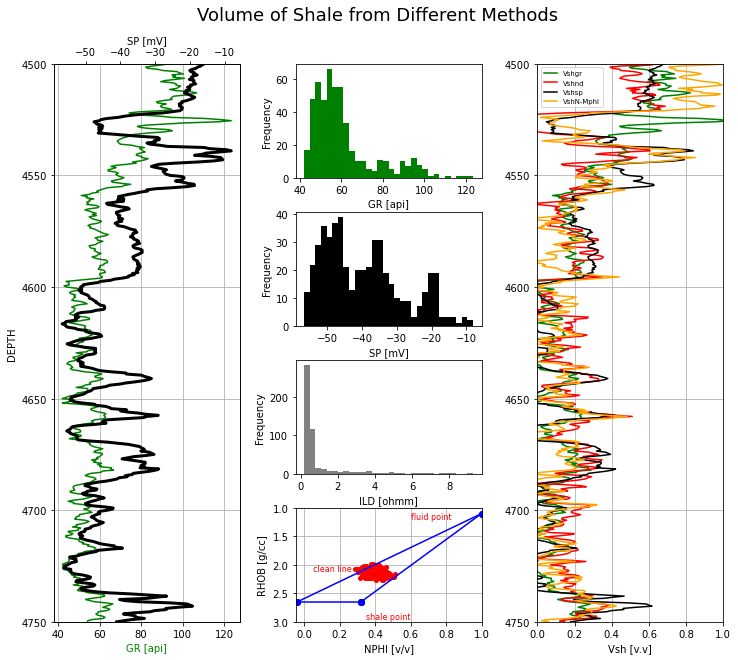

In [14]:
# Plot Intermediate Depth Plot
intermediate_plot(top_depth,bottom_depth)


## We could use multiple clay indicators with a Hodges-Lehman approach, but not yet implemented

### Asign Shale Volume Method:
#### In this example we are using the Nuetron-Mphi Cross Plot shale triangle to estimate shale volumes.Both the Neutron and NMR MPHI are responding to the hydrogen protons, but the Neutron lot also sees the bound water on the shales (OH), which makes this a very good shale indicator. 

In [15]:
logs['vsh']=(logs['vshnmphi']).clip(0,1)

/home/craig/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Porosity Calculations:
#### In this example we are using the Neutron-Density Cross Plot porosity

In [16]:
"""
===============================================================================
 === 4. Porosity:
 
 Three logs are available for porosity estimation: sonic, density and
 neutron. Porosity can be evaluated by single or dual combinations of
 any three types mentioned: neutron-density, neutron-sonic and
 sonic-density. Basic porosity formulas are: - Sonic: Willie,
 Raymer-Hunt-Gardner; - Density; - Neutronic;
 
 The NEUTRON-DENSITY gives best result in any type of lithology
===============================================================================
"""

#Willie-TimeAverage
def phis_shale(dt_shale, dt_matrix, dt_fluid):
    phis_shale = (dt_shale-dt_matrix)/(dt_fluid-dt_matrix)
    return phis_shale
def phis_w(dt_log, dt_matrix, dt_fluid, cp):
    phis_w=(1/cp)*(dt_log-dt_matrix)/(dt_fluid-dt_matrix)
    return phis_w
def phis_w_sh_corr(dt_log, dt_matrix, dt_fluid, cp, dt_shale, vsh):
    phis_w=(1/cp)*(dt_log-dt_matrix)/(dt_fluid-dt_matrix)
    phis_w_sh = (dt_shale-dt_matrix)/(dt_fluid-dt_matrix)
    phis_w_sh_corr = phis_w - vsh * phis_w_sh
    return phis_w_sh_corr

#Raymer-Hunt-Gardner (the alpha(5/8) ranges from 0.625-0.70, 0.67-most, 0.60-gas reservoirs)
def phis_rhg(dt_log, dt_matrix, alpha):
    phis_rhg=(alpha)*(dt_log-dt_matrix)/(dt_log)
    return phis_rhg
def phis_rhg_sh_corr(dt_log, dt_matrix, dt_shale, vsh):
    phis_rhg=(5/8)*(dt_log-dt_matrix)/(dt_log)
    phis_rhg_sh = (dt_shale-dt_matrix)/(dt_fluid-dt_matrix)
    phis_rhg_sh_corr = phis_rhg - vsh * phis_rhg_sh
    return phis_rhg_sh_corr

#Density
def phid(den_log, den_matrix, den_fl, den_shale, vsh):
    phid = (den_log - den_matrix) / (den_fl - den_matrix)
    return phid
def phid_shale(den_shale, den_matrix, den_fl):
    phid_shale = (den_shale - den_matrix) / (den_fl - den_matrix)
    return phid_shale
def phid_sh_corr(den, den_matrix, den_fl, den_shale, vsh):
    phid = (den - den_matrix) / (den_fl - den_matrix)
    phid_sh = (den_shale - den_matrix) / (den_fl - den_matrix)
    phid_sh_corr = phid - vsh * phid_sh
    return phid_sh_corr

# NEUTRON:
def phin_sh_corr(neut, neut_sh, vsh):
    phin_sh_corr = (neut-vsh*neut_sh)
    return phin_sh_corr


#Neutron-Density
def phixnd(phinshc, phidshc):
    phixnd= (phinshc + phidshc) / 2
    return phixnd


def phixnd_gas_corr(phin, phid, phin_sh, phid_sh):
    phixnd_gas_corr= ((phin**2+phin**2)/2)**(0.5)    #for gas intervals (nphi<dphi = crossover)
    return phixnd_gas_corr


phis_sh=phis_shale(dt_shale, dt_matrix, dt_fluid)

#phid_sh=phis_shale(den_shale, den_matrix, den_fl) is this a type using phis_shale and not phid_shale???
phid_sh=phid_shale(den_shale, den_matrix, den_fl)

######phin_sh=45
phin_sh=neut_shale


#calculate the vsh functions, by looping with pandas series values through vsh functions defined above
logs['PHISw']=phis_w(logs.DT, dt_matrix, dt_fluid, cp)
logs['PHISwshc']=phis_w_sh_corr(logs.DT, dt_matrix, dt_fluid, cp, dt_shale, logs.vsh).clip(0,1)

logs['PHISrhg']=phis_rhg(logs.DT, dt_matrix, alpha)
logs['PHISrhgshc']=phis_rhg_sh_corr(logs.DT, dt_matrix, dt_shale, logs.vsh).clip(0,1)

logs['PHID']=phid(logs.RHOB, den_matrix, den_fl, den_shale, logs.vsh)
logs['PHIDshc']=phid_sh_corr(logs.RHOB, den_matrix, den_fl, den_shale, logs.vsh).clip(0,1)

logs['PHIN']=logs.NPHI
logs['PHINshc']=phin_sh_corr(logs.NPHI, phin_sh, logs.vsh).clip(0,1)

logs['PHIxND']=phixnd(logs.PHINshc,logs.PHIDshc).clip(0,1)


# A PHIxND porosity is a good estimation of effective porosity. Calculated
# porosities above are similar with core porosities (see
#     http://certmapper.cr.usgs.gov/data/PubArchives/OF00-200/WELLS/WALAKPA1/LAS/WA1LOG.JPG)

######logs['PHIE']=logs['PHIxND']

#logs['PHIT']=logs['PHIxND']
logs['PHIT']=((logs['PHID']+logs['NPHI'])/2).clip(0,1)
#logs['PHIT']=math.sqrt((logs['PHID']*logs['PHID']+logs['NPHI']*logs['NPHI'])/2).clip(0,1)

#logs['PHIT']=logs['Phixnd_chartbook']

/home/craig/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/craig/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/craig/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

### Model Clay Bound Water (CBW) to account for Clay Conductance and calculate PHIE

##### It is important to plot the volume of CBW vs. Vshale to assess if there are some light hydrocarbon intervals resulting on a surpressed effective porosity MPHI allowing for excess CBW. We typically make a cross plot of Vsh vs. CBW to observe if the trend is linear or if there are some sample points in the cross plot that show too much CBW. 

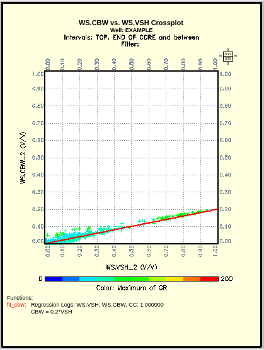

### Calculate CBWa by taking the difference between PHIT and MBVI

In [17]:
logs['CBWa'] = (logs['PHIT'] - logs['MPHI']).clip(0,1)

#logs['CBW'] = (por_shale*logs['vsh']).clip(0,1)

/home/craig/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### A typical trend will have a y-intercept of 0 and a slope of 0.2 to 0.3. We will first try to model CBW from Vsh using a slope of 0.25. We call this a CBW_Int @ Vsh = 1
#### Initial CBW_Int set at 0.2

In [18]:
CBW_Int = 0.25

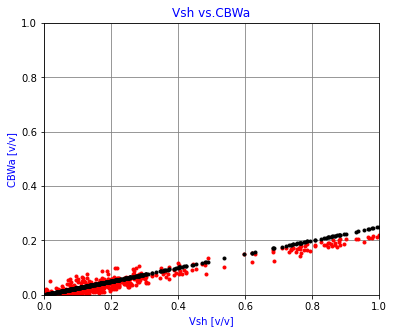

In [19]:
vsh_limit=0.0  # volume of Vsh for lower limit of data on graph


cbw_figure=plt.figure(figsize=(6,5))
plt.title('Vsh vs.CBWa', color = 'blue')
#plt.plot(logs.vsh,logs.CBWa,'ro', label='',color='red')
plt.plot(logs.vsh[logs.vsh>vsh_limit],logs.CBWa[logs.vsh>vsh_limit],'r.', label='',color='red')
plt.plot(logs.vsh,logs.vsh*CBW_Int,'k.', label='',color='black')
plt.xlim(0.0,1)
plt.ylim(0.0,1)
plt.ylabel('CBWa [v/v]', color = 'blue')
plt.xlabel('Vsh [v/v]', color = 'blue')
plt.grid(True, which='both',ls='-',color='gray')

### Adjust the CBW_Int if needed in the cell below

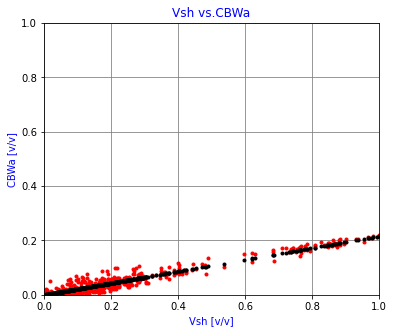

In [20]:
"""
Final CBW_Intercept of slope of line to define CBW
"""
#========== Adjust CBW_Int  =================================
CBW_Int = 0.215
#============================================================




vsh_limit=0.0  # volume of Vsh for lower limit of data on graph


cbw_figure=plt.figure(figsize=(6,5))
plt.title('Vsh vs.CBWa', color = 'blue')
#plt.plot(logs.vsh,logs.CBWa,'ro', label='',color='red')
plt.plot(logs.vsh[logs.vsh>vsh_limit],logs.CBWa[logs.vsh>vsh_limit],'r.', label='',color='red')
plt.plot(logs.vsh,logs.vsh*CBW_Int,'k.', label='',color='black')
plt.xlim(0.0,1)
plt.ylim(0.0,1)
plt.ylabel('CBWa [v/v]', color = 'blue')
plt.xlabel('Vsh [v/v]', color = 'blue')
plt.grid(True, which='both',ls='-',color='gray')

#### *** You should now have a very good model for CBW volume ***

## Final Calculation for CBW and then use CBW Volume to then calculate Effective Porosity

In [21]:
logs['CBW'] = (logs['vsh'] * CBW_Int).clip(0,1)

/home/craig/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
#logs['PHIE']=logs['PHIT'] - por_shale*logs['vsh']
#logs['PHIE']=(logs['PHIT'] - por_shale*logs['vsh']).clip(0,1)
logs['PHIE']=(logs['PHIT'] - CBW_Int*logs['vsh']).clip(0,1)

/home/craig/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Calculate Swb and Qv.   Qv is used in Waxman-Smits saturation calculations

In [23]:
# Calculations for Swb used in Dual Water and WaxSmits
logs['Swb'] =( 1 - logs['PHIE']/logs['PHIT']).clip(0,1)

# Qv from Swb using Hill, Shirley and Klein
logs['Qv'] = (logs['Swb']/(0.6425/((den_fl*SAL)**0.5) +0.22)).clip(0,5)


/home/craig/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/craig/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


### Pickett Plot is used to define Rw

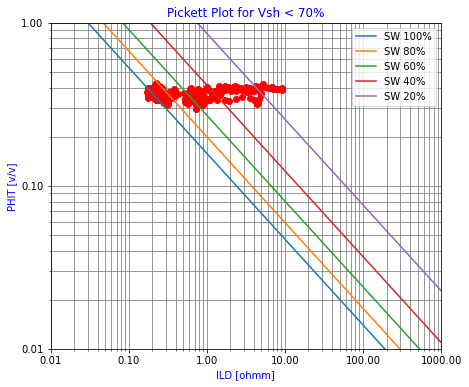

In [24]:
import matplotlib.ticker as ticker

vsh_limit=0.7  # volume of shale upper limit for selction of data for graph


pickett_figure=plt.figure(figsize=(7,6))
plt.title('Pickett Plot'+ ' for Vsh < '+str(int(vsh_limit*100))+'%', color = 'blue')
plt.loglog(logs.ILD[logs.vsh<vsh_limit],logs.PHIT[logs.vsh<vsh_limit],'ro', label='',color='red')
plt.xlim(0.01,1000)
plt.ylim(0.01,1)
plt.ylabel('PHIT [v/v]', color = 'blue')
plt.xlabel('ILD [ohmm]', color = 'blue')
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter("%.2f"))
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter("%.2f"))

#calculate the saturation lines
sw_plot=(1.0,0.8,0.6,0.4,0.2)
phie_plot=(0.01,1)
rt_plot=np.zeros((len(sw_plot),len(phie_plot)))
                
for i in range (0,len(sw_plot)):
    for j in range (0,len(phie_plot)):
        rt_result=((1*Rwa)/(sw_plot[i]**n_sat)/(phie_plot[j]**m_cem))
        rt_plot[i,j]=rt_result      
for i in range(0,len(sw_plot)):
    plt.plot(rt_plot[i],phie_plot, label='SW '+str(int(sw_plot[i]*100))+'%')
    plt.legend (loc='best')
plt.grid(True, which='both',ls='-',color='gray')

#plt.savefig('pickett.png', dpi=200, format='png')


## Create a variable m* model:
### Below is a Vsh vs. m* apparent Cross Polot that is used to model a variable m*  with change in Vsh

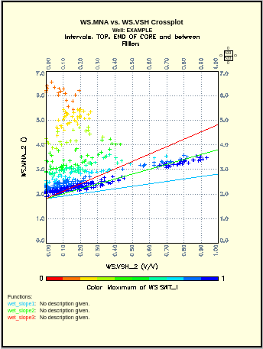

#### The objective is to model m* vs. Vsh to have a variable 'm*'. As with the plot below, the wet trend (dark blue samples representing very high water saturations) is very distinctive and m* increases linearly with increased Vsh. 






### Assign the correct slope for the above type Apparent m* vs Vsh plot
#### The calculation of MNA or m*_apparent needs to be fixed in this notebook to make the proper plot and determine mslope. 
##### For now we are using an mslope of 1.8 per the above image. The light blue line has a slope of 1, the green line has a slope of 2 and the red line has a slope of 3. The wet trend data above fits a slope of 1.8 and this is what is being used for mslope. 

In [25]:
# Slope of Swb vs. Mstar apparent for Mstar across all Swb's
mslope = 1.8

# Calcualte Apparent m*
def Mstarapp(Rw, ILD , B, Qv, PHIT):
    #--------------------------------------------------
    #
    #    COMPUTE MNA
    #
    #--------------------------------------------------
    Mstarapp = np.log10(Rw/(ILD*(1+Rw*B*Qv)))/np.log10(PHIT)
    return Mstarapp

# Input parameters for Top and Bottom depths 
#logs=data[(data.DEPT >= top_depth) & (data.DEPT <= bottom_depth)]

#initialize various Vsh
Mstarapp_temp = []
# =============================================================================
# =============================================================================
# This is key for the input of log data to be used in MNA calculations
# =============================================================================
for (i,j,k) in zip(logs.ILD, logs.Qv, logs.PHIT):
    Mstarapp_temp.append(Mstarapp(Rw, i, B , j, k))
# =============================================================================
# This is the input of log data used in MNA calculations
# =============================================================================
logs.is_copy = False # without will throw an exception

logs['Mstarapp']=Mstarapp_temp

del  Mstarapp_temp         #remove the arrays to free-up memory

logs.head()

/home/craig/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,SP,GR,CALI,BitSize,LL8,ILM,ILD,RHOB,NPHI,DT,...,PHIN,PHINshc,PHIxND,PHIT,CBWa,CBW,PHIE,Swb,Qv,Mstarapp
DEPTH,,,,,,,,,,,,,,,,,,,,,
4500.0,-15.8130,93.3120,10.1790,10,0.5200,0.5630,0.5620,2.2130,0.494310,40,...,0.494310,0.174310,0.228123,0.388123,0.219683,0.215000,0.173123,0.553948,2.034584,3.664944
4500.5,-16.5108,90.0702,10.1923,10,0.5398,0.5687,0.5587,2.2048,0.473878,40,...,0.473878,0.175850,0.231538,0.380552,0.204702,0.200238,0.180314,0.526177,1.932582,3.562292
4501.0,-16.8750,85.3410,10.2940,10,0.5740,0.5720,0.5570,2.1990,0.424170,40,...,0.424170,0.178725,0.234846,0.357569,0.178844,0.164908,0.192661,0.461193,1.693906,3.293805
4501.5,-17.8230,82.2392,10.5195,10,0.6068,0.5722,0.5532,2.1918,0.408417,40,...,0.408417,0.181600,0.238606,0.352015,0.170415,0.152393,0.199622,0.432915,1.590044,3.215732
4502.0,-18.1880,83.0450,10.5120,10,0.6160,0.5680,0.5490,2.1860,0.416500,40,...,0.416500,0.185690,0.242522,0.357927,0.172237,0.155075,0.202852,0.433260,1.591309,3.260725


## The following plot is Vsh vs. m*_apparent
### The black points are the fit of the wet trend in the plot below that define how m* varies with Vsh
    m* = Vsh * mslope + m_cem
### m_cem is the Archie m in the saturation equation and mslope is the slope of the black line
### For this interpretation, it is important to adjust m_cem and mslope to fit the wet trend data

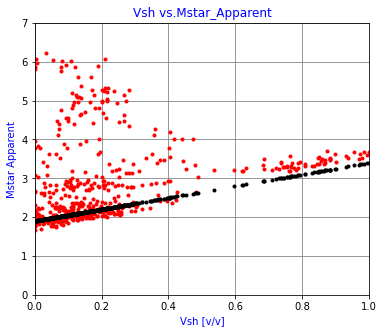

In [26]:
mslope = 1.5

mapp_figure=plt.figure(figsize=(6,5))
plt.title('Vsh vs.Mstar_Apparent', color = 'blue')
plt.plot(logs.vsh,logs.Mstarapp,'r.', label='',color='red')
plt.plot(logs.vsh,logs.vsh*mslope + m_cem,'r.', label='',color='black')
plt.xlim(0.0,1)
plt.ylim(0,7)
plt.ylabel('Mstar Apparent', color = 'blue')
plt.xlabel('Vsh [v/v]', color = 'blue')
plt.grid(True, which='both',ls='-',color='gray')

### Adjust the m_cem (y-intercpt @ Vsh = 0) and m* slope (mslope) of the black line if needed in the cell below. 

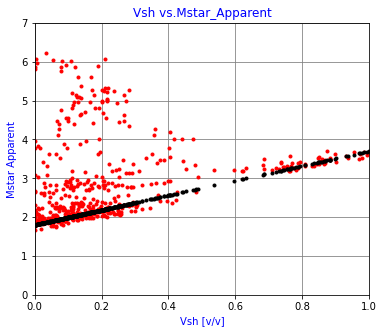

In [27]:
#========== Adjust m* Slope =================================
mslope = 1.9
m_cem  = 1.8
#============================================================

mapp_figure=plt.figure(figsize=(6,5))
plt.title('Vsh vs.Mstar_Apparent', color = 'blue')
plt.plot(logs.vsh,logs.Mstarapp,'r.', label='',color='red')
plt.plot(logs.vsh,logs.vsh*mslope + m_cem,'r.', label='',color='black')
plt.xlim(0.0,1)
plt.ylim(0,7)
plt.ylabel('Mstar Apparent', color = 'blue')
plt.xlabel('Vsh [v/v]', color = 'blue')
plt.grid(True, which='both',ls='-',color='gray')

#### *** Now you should have a well defined variable m* for Waxman-Smits ***

### Saturation Calculations:

In [28]:
"""
# =============================================================================
# # From the Picket plot results we estimate Rw.
# =============================================================================


===============================================================================
 === 5. Water Saturation
 
 Before calculating the water saturation we need a value for the Rw(Resistivity of water)
 
 ===== Resistivity of water
 
 It can be determined from: - water catalogs - DST test water analysis -
 Rw from SP (needs information about Rmud and … ) - Rwa Method (Rw from a
 100% water zone)
 
 Assume that we have no ideea about the Rw of water, then best practice is a
 PICKETT plot. This plot is logarithmic plot using Gus Archie’s equation:
 
 ===== Archie Water Saturation Eq.
 
 Sw^n_sat = (a * Rw) / (Rt * PHI ^ m_cem)
 
 Equation can be re-write in a logarithm way and plotted in a log graph
 RT vs PHI:
 
 log(PHI) = - (1 / m_cem) * log(R_t) - n_sat * log(Sw) + log( a * Rw)

 IMO we should use 'a' = 1 since at 100% Porosity Ro/Rw = 1
"""
print()


# Add the equation in a function named: sw_archie,
def sw_archie(Rw, Rt, Poro, a, m_cem, n_sat):
        F = 1 / (Poro**m_cem)
        Sw_archie = (F * Rw/Rt)**(1/n_sat)
        return Sw_archie


def sw_dw(Rw, T, RwT, Rt, PHIT, PHIE, Swb, MBVI, MPHI):
        '''
        dualwater(Rw, Rt, PHIT, por_shale, Vsh, Rsh)
        **Dual-Water (clavier, 1977) with later modifications/rearrangements.
          Formulas from Doveton "Principles of mathematical petrophysics"
        *Input parameters:
         - PHIT - total porosity
         - por_shale - shale porosity
         - Rw - formation water resistivity [ohmm]
         - Swb - clay-bound water saturation 
         - Sw_dw - total water saturation
         *Returns:
         - Sw_dw - Total water saturation (or water saturation in Total pore space)
         - CBVWT - Coates DW CBW in Total Porossity system

         1. Coates, G.R., Gardner, J.S., and Miller, D.L., 1994, 
            Applying pulse-echo NMR to shaly sand formation evaluation, 
            paper B, 35th Annual SPWLA Logging Symposium Transactions, 22 p.
        '''

        #--------------------------------------------------
        #
        #  BEGINNING OF MRIAN AS PROPOSED BY COATES, et al
        #
        #----- COMPUTE BASIC DATA -------------------------
        #RwT = T
        CW = (T+7.)/(Rw*(RwT+7.))
        #----  CCW FROM COATES   
        CCW = 0.000216*(T-16.7)*(T+504.4)
        Ct   = 1/Rt
        #--------------------------------------------------
        #Swb = 1.0 - (PHIE/PHIT)
        Swia=MBVI/MPHI
        #Swia = Swb #estimate
        #--------------------------------------------------
        CBW = Swb * PHIT
        # MBVI in Total Porosity System
        BVIT  = MBVI + CBW
        SWBI  = CBW/PHIT
        #----- COMPUTE DCW ------------------------------
        ALPHA = 1 #for now with Salinity > 40,000 ppm
        DCWW=CW+ALPHA*Swb*(CCW-CW)
        DCWI=CW+ALPHA*SWBI*(CCW-CW)
        #----- W @ Sw = 1 -----------------------------------
        #WW=math.log10(Ct/DCWW)/(math.log10(PHIT))
        #----- W @ Sw AT BVI --------------------------------
        #WI=math.log10(Ct/DCWI)/(math.log10(BVIT))
        #----- THE ACTUAL W ---------------------------------
        Wq = 0.4*Swia + 1.65
        #Wq = 0.4*Swia + 1.9
        #----- WW AND WI CONSTRAN W ------------------------
        #----- COMPUTE CBVW TOTAL -----------------------
        #AA=CW
        #BB=ALPHA*(CBW)*(CW-CCW)
        #CC=Ct
        #CBVWA = (BB + math.sqrt(BB*BB + 4*AA*CC))/(2*AA)
        CBVWA = (ALPHA*(CBW)*(CW-CCW) + ((ALPHA*(CBW)*(CW-CCW))**2 + 4*CW*Ct)**(1/2))/(2*CW)
        CBVWT = CBVWA**(2/Wq)
        #---- COMPUTE Bulk Volume Water CBVWE in Effective System ----------
        #CBVWE = CBVWT-CBW    
        Sw_dw = CBVWT/PHIT
        return Sw_dw
        #------------------------------------------------------------
        #      END OF GEORGE COATES' MRIAN                                        
        #-------------------------------------------------------------

def waxmansmits(Rw, T, RwT, Rt, PHIT, PHIE, den_fl, m_cem, mslope, Vsh, Rw75, Qv, B):
        '''
        waxmansmits(Rw, Rt, PhiT, aa, mm, CEC)
        **Waxman-Smits CEC method obtains Qv from Hill, Shirley and Klein
          Eq solved for n=2
        *Input parameters:
         - PHIT - total porosity
         - m_cem -  cementation exponent is adjusted for Swb
         - Rw - formation water resistivity ohmm
         - B - cation mobility (mho cm2 / meq)
         - Qv - concentration of exchange cations per volume unit (meq/ml pore space)
         - CEC - cation exchange capacity of shale(meq/100 gm of sample)
         - den_ma - mineral graind density (g/cc)
         - m_cem - best determined from SCAL      
        *Returns:
         - Sw_Total_WS - total water saturation from Waxman-Smits
         - Sw_WS =(  ((1/PHIT**mstar)*Rw)/Rt*(1+Rw*B*QV)/Sw )**(1/nstar)
        '''
        
        #convert m_cem to mstar with increase in mstar with increase in Swb
        mstar = m_cem + mslope*Vsh

        #Crain's Waxman-Smits in lieu of using iterative. 
        #Swc = 0.5 * ((- B * Qv * RW2) + ((B * Qv *  RW2)**2 + 4 * F * RW@FT / RESD) ^ 0.5)**(2 / N)
        swT = 0.5 * (    (- B*Qv*Rw75) + (  (B*Qv*Rw75)**2  +  4*(1/PHIT**mstar)*Rw/Rt)**0.5)**(2/2)
        return swT

 
def waxmansmits_it(Rw, Rt, phit,  m_cem, mslope, Vsh, Qv, B):    
        #------------------------------------------------------------
        #      WAXMAN-SMITS ITERATIVE approach to calculating Swt                                   
        #------------------------------------------------------------
        #------------------------------------------------------------       
        #convert m_cem to mstar with increase in mstar with increase in Swb
        mstar = m_cem + mslope*Vsh
                        
        swap=0
        for i in range(0, 100, 1):
            swap = swap + .01
            swt_i =(((1/phit**mstar)*Rw)/(Rt*(1+Rw*B*Qv/swap)))**(1/2)
            if swt_i <= swap:
                exit
        return swt_i
    


logs['Sw_archie']=(sw_archie(Rw,logs.ILD,logs.PHIT,1,m_cem,n_sat)).clip(0,1)
#Calculate the BVW (bulk volume of water) for Archie:
logs['BVW']=(logs['Sw_archie']*logs['PHIT']).clip(0,1)

logs['Sw_dw'] =(sw_dw(Rw, T, RwT, logs.ILD, logs.PHIT, logs.PHIE, logs.Swb,logs.MBVI, logs.MPHI)).clip(0,1)
#Calculate the BVW Effective for DW:
logs['CBVWE']=(logs['Sw_dw']*logs['PHIT'] - logs['CBW']).clip(0,1)

logs['Sw_ws'] =(waxmansmits(Rw, T, RwT, logs.ILD, logs.PHIT, logs.PHIE, den_fl, m_cem, mslope, logs.vsh, Rw75, logs.Qv, Bdacy)).clip(0,1)
#logs['Sw_wsi'] =(waxmansmits_it(Rw, logs.ILD, logs.PHIT, m_cem, mslope, logs.vsh, logs.Qv, B)).clip(0,1)

logs['WSCBVWE']=(logs['Sw_ws']*logs['PHIT'] - logs['CBW']).clip(0,1)
logs['matrix']=(1 - logs.CBW - logs.PHIE).clip(0,1)


/home/craig/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/craig/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/craig/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

### Final Interpretation Depth Plot:

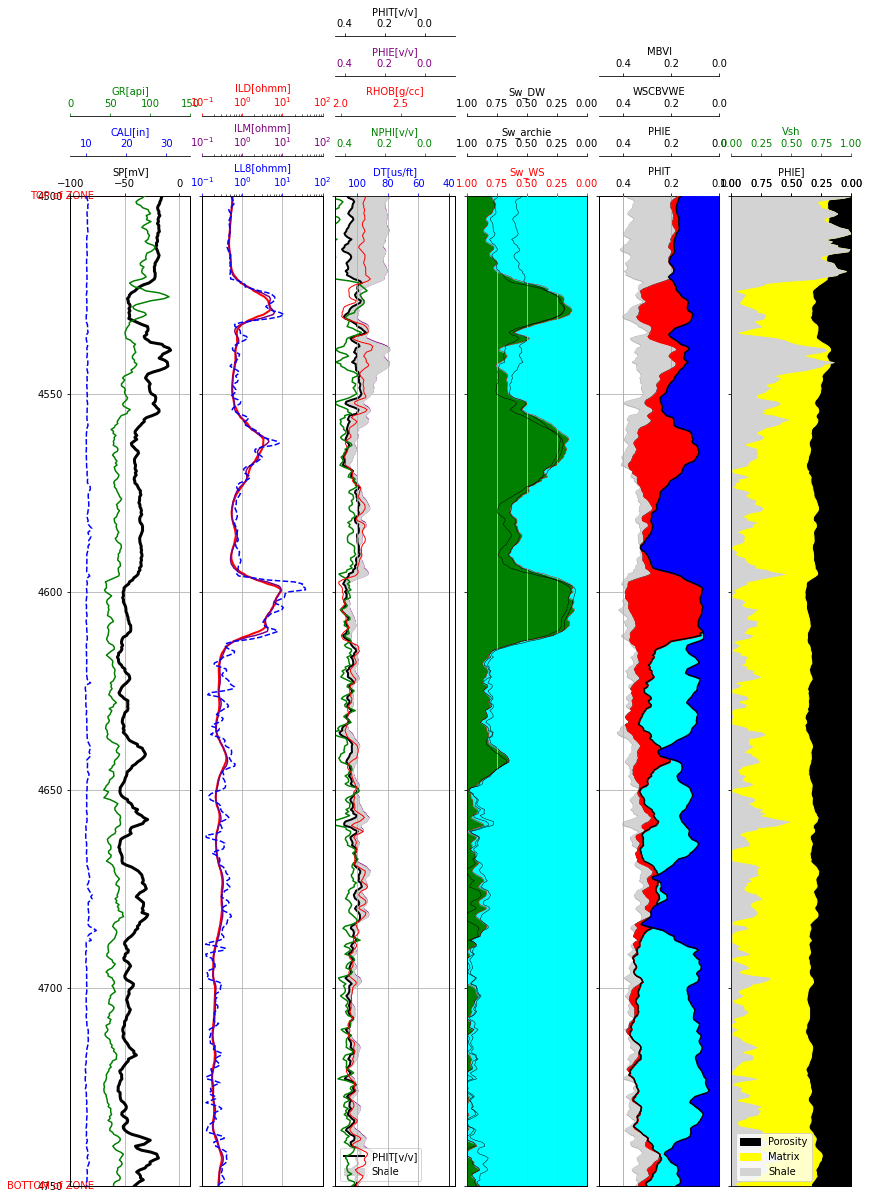

In [29]:
# Plot Final Depth Plot
final_plot(top_depth,bottom_depth)

### Summary Histograms:

MAIN ZONE of INTEREST: 4500 to 4750 feet
Mean values:


PHIE       0.315480
WSCBVWE    0.212247
Sw_ws      0.718893
vsh        0.221213
dtype: float64

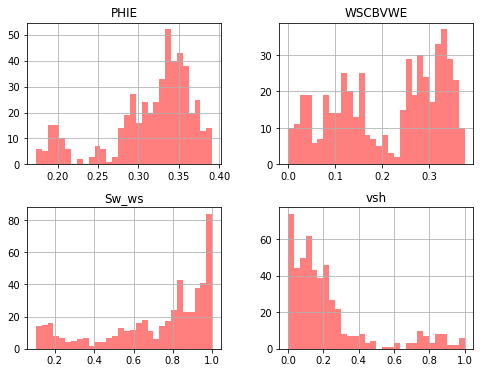

In [30]:
"""
===============================================================================
 == 7. Summary Plots
 
 A small example of an average properties over an interval, can be done as follows:
 
==============================================================================
"""

logs.loc[top_summary:bottom_summary,{'PHIE','Sw_ws','WSCBVWE','vsh'}].hist(figsize=(8, 6),alpha=0.5,bins=30,color='red')
print ('MAIN ZONE of INTEREST:', top_summary, 'to', bottom_summary, 'feet')
print ('Mean values:')
logs.loc[top_summary:bottom_summary,{'PHIE','Sw_ws','WSCBVWE','vsh'}].mean()


In [31]:
logs.head()

,SP,GR,CALI,BitSize,LL8,ILM,ILD,RHOB,NPHI,DT,...,Swb,Qv,Mstarapp,Sw_archie,BVW,Sw_dw,CBVWE,Sw_ws,WSCBVWE,matrix
DEPTH,,,,,,,,,,,,,,,,,,,,,
4500.0,-15.8130,93.3120,10.1790,10,0.5200,0.5630,0.5620,2.2130,0.494310,40,...,0.553948,2.034584,3.664944,0.541527,0.210179,0.740299,0.072327,0.797616,0.094573,0.611877
4500.5,-16.5108,90.0702,10.1923,10,0.5398,0.5687,0.5587,2.2048,0.473878,40,...,0.526177,1.932582,3.562292,0.552839,0.210384,0.747244,0.084128,0.789153,0.100076,0.619448
4501.0,-16.8750,85.3410,10.2940,10,0.5740,0.5720,0.5570,2.1990,0.424170,40,...,0.461193,1.693906,3.293805,0.585611,0.209396,0.770968,0.110766,0.781013,0.114358,0.642431
4501.5,-17.8230,82.2392,10.5195,10,0.6068,0.5722,0.5532,2.1918,0.408417,40,...,0.432915,1.590044,3.215732,0.595956,0.209786,0.776396,0.120910,0.770024,0.118667,0.647985
4502.0,-18.1880,83.0450,10.5120,10,0.6160,0.5680,0.5490,2.1860,0.416500,40,...,0.433260,1.591309,3.260725,0.589331,0.210938,0.767173,0.119517,0.758670,0.116473,0.642073


### Save Data:

In [32]:
#Then we can incorporate our calculated logs into the main pandas dataframe:

curves_to_export={'PHIE','Sw_ws','BVW','vsh'}
for x in curves_to_export:
    data[x] =logs[x]

#You have the option to export the dataframe to a csv file:


logs.to_csv('GulfCoast Well Logs.csv', encoding='utf-8')
